In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import pi
import math

# importing Qiskit
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.providers.aer.noise import NoiseModel

# import basic plot tools

from qiskit.tools.visualization import plot_histogram, plot_circuit_layout

from qiskit.providers.ibmq import least_busy

from qiskit.compiler import transpile

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Replace TOKEN with your string
#IBMQ.save_account('717cf61727cdb38042395c8140ffda877eedc5a316b84196c709e29869a6620ef09f9872200dc64ec870c7e5051229c976715491941396be89791d1a0ba5a803',overwrite=True)

# In subsequent sessios the Token can be loaded from disk
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
# Plot results
def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()
    print(D)
    zero = 0
    one = 0
    for r in D:
        if(r[1]=='0'):
            zero += D[r]
        else: 
            one += D[r]
    print("Zero" + str(zero/8192))
    print("One" + str(one/8192))

# Execute circuit, display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim,shots=8192)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: \n\n", result_counts)
    show_results(result_counts)

In [14]:
provider = IBMQ.get_provider(hub='ibm-q-minho', group='academicprojects', project='quantalab')
provider.backends()
physical_devices = provider.backends(simulator=False, operational=True)
for backend in physical_devices:
    print(backend.status())
backend = provider.get_backend('ibmq_johannesburg')
print (backend);
real_device = backend

BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=2, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='2.1.0', operational=True, pending_jobs=9, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=2, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_valencia', backend_version='1.3.0', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.1.0', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmq_johannesburg', backend_version='1.2.2', operational=True, pending_jobs=1, status_msg='active')
BackendStatu

In [15]:
def generator(qc,qr,cr):
    qc.h(qr[0])
    qc.cx(qr[0],qr[1])
    qc.cx(qr[0],qr[2])

In [16]:
def sign(qc,qa,qr,k,id,r,M):
    max = 32
    step = 2*pi/max
    rotations = hash(k+id+r+M) % max
    qc.u1(rotations*step,qa[0])
    qc.barrier()
    qc.cx(qa[0],qr[0])
    qc.h(qa[0])
    qc.cx(qr[0],qr[1])
    qc.cz(qa[0],qr[1])
    qc.barrier()
    

In [17]:
def measure():
    #cheque.measure(qa,ca)
    #cheque.measure(qr,cr)
    cheque.measure(qb[1],cb[0])  

In [18]:
def verify(qc,qr,qb,k,id,r,M):
    max = 32
    step = 2*pi/max
    rotations = hash(k+id+r+M) % max
    qc.h(qr[2])
    qc.cz(qr[2],qr[1])
    qc.barrier()
    qc.u1(rotations*step,qb[0])
    qc.h(qb[1])
    qc.cswap(qb[1],qb[0],qr[1])
    qc.h(qb[1])
    qc.barrier()

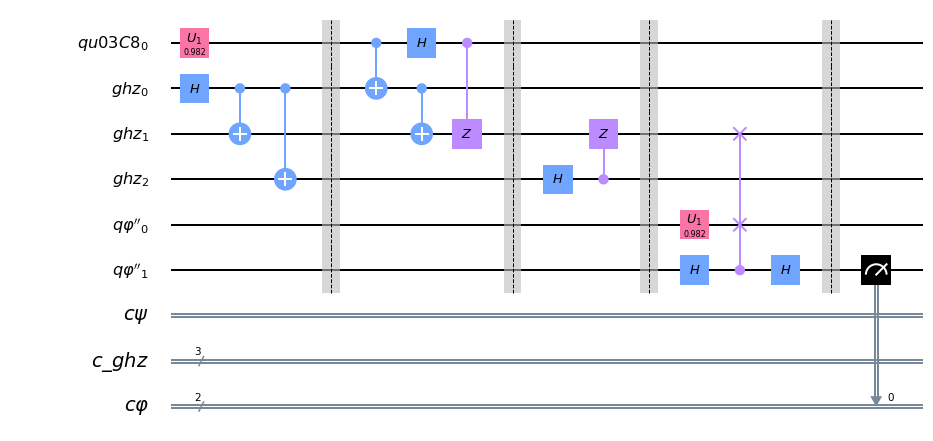

In [32]:
qr = QuantumRegister(3,'ghz')
qa = QuantumRegister(1,'q  ''\u03C8')
qb = QuantumRegister(2,'q  \u03C6\'')
cr = ClassicalRegister(3,'c\_ghz')
ca = ClassicalRegister(1,'c \u03C8')
cb = ClassicalRegister(2,'c \u03C6')
cheque = QuantumCircuit(qa,qr,qb,ca,cr,cb)
generator(cheque,qr,cr)
sign(cheque,qa,qr,"a","b","c","d")
verify(cheque,qr,qb,"a","b","c","d")
measure()
cheque.draw(output='mpl')

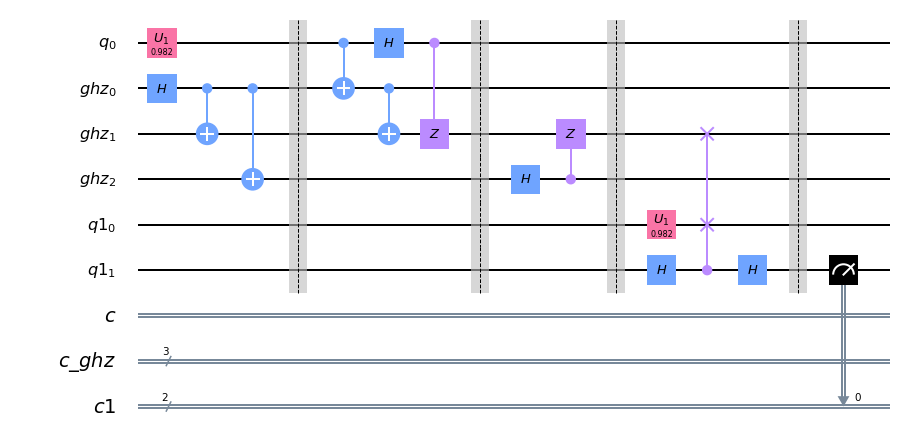

In [35]:
qr = QuantumRegister(3,'ghz')
qa = QuantumRegister(1,'q  ')
qb = QuantumRegister(2,'q 1 ')
cr = ClassicalRegister(3,'c\_ghz')
ca = ClassicalRegister(1,'c')
cb = ClassicalRegister(2,'c1')
cheque = QuantumCircuit(qa,qr,qb,ca,cr,cb)
generator(cheque,qr,cr)
sign(cheque,qa,qr,"a","b","c","d")
verify(cheque,qr,qb,"a","b","c","d")
measure()
cheque.draw(output='mpl')

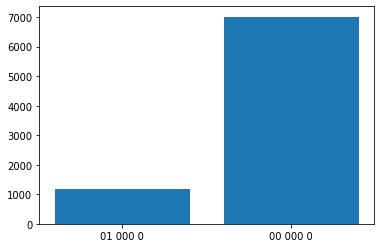

{'01 000 0': 1179, '00 000 0': 7013}
Zero0.8560791015625
One0.1439208984375


In [116]:
job = execute(cheque,backend, shots=8192)
D = job.result().get_counts()
show_results(D)

simulation: 

 {'00 000 0': 8192}


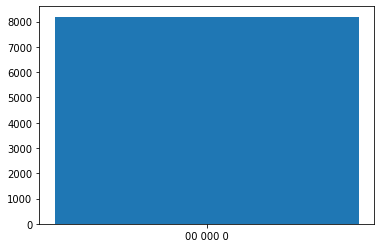

{'00 000 0': 8192}
Zero1.0
One0.0


In [28]:
execute_locally(cheque)

In [85]:
Backup

In [105]:
Backup2

In [109]:
Backup3 = D

In [36]:
cheque_exp = transpile(cheque,backend=backend)

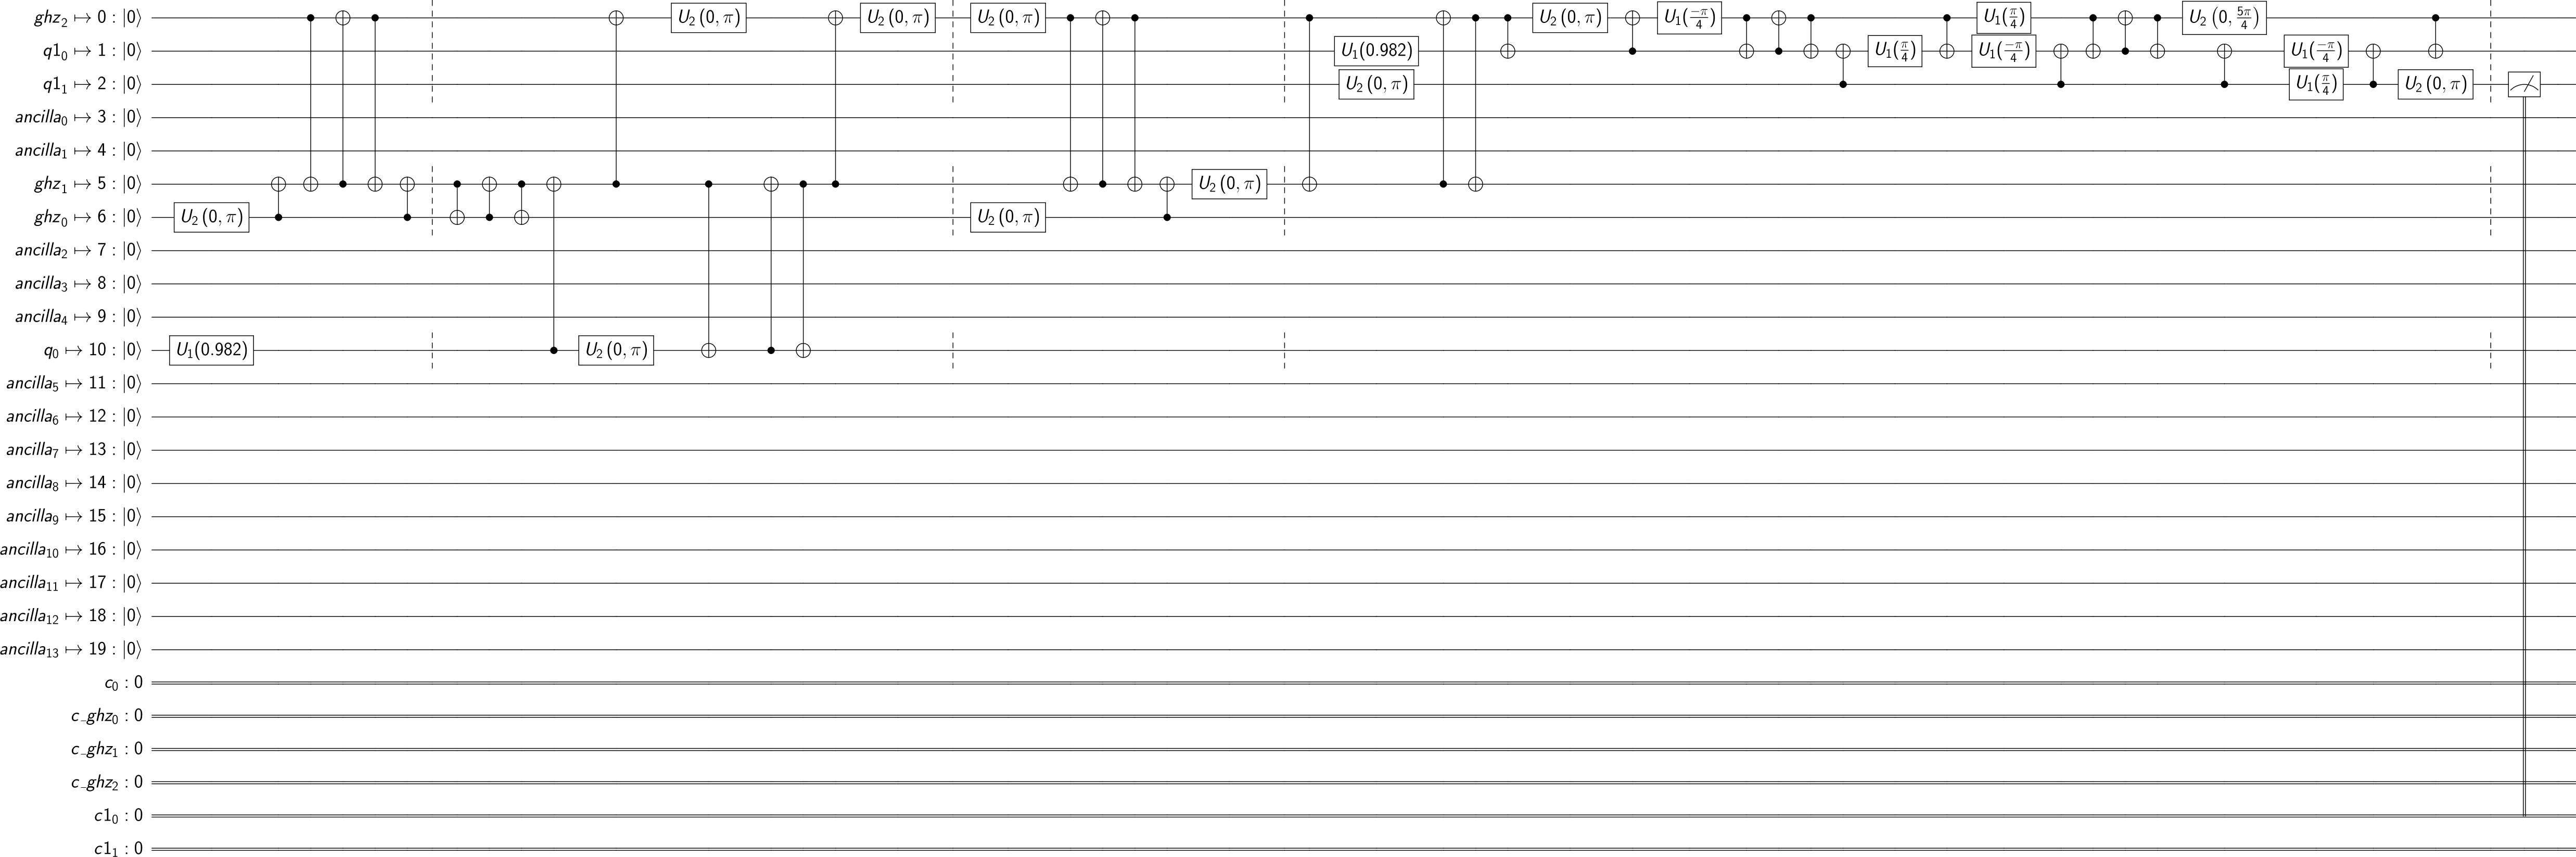

In [38]:
from qiskit.visualization import circuit_drawer
circuit_drawer(cheque_exp,output='latex')

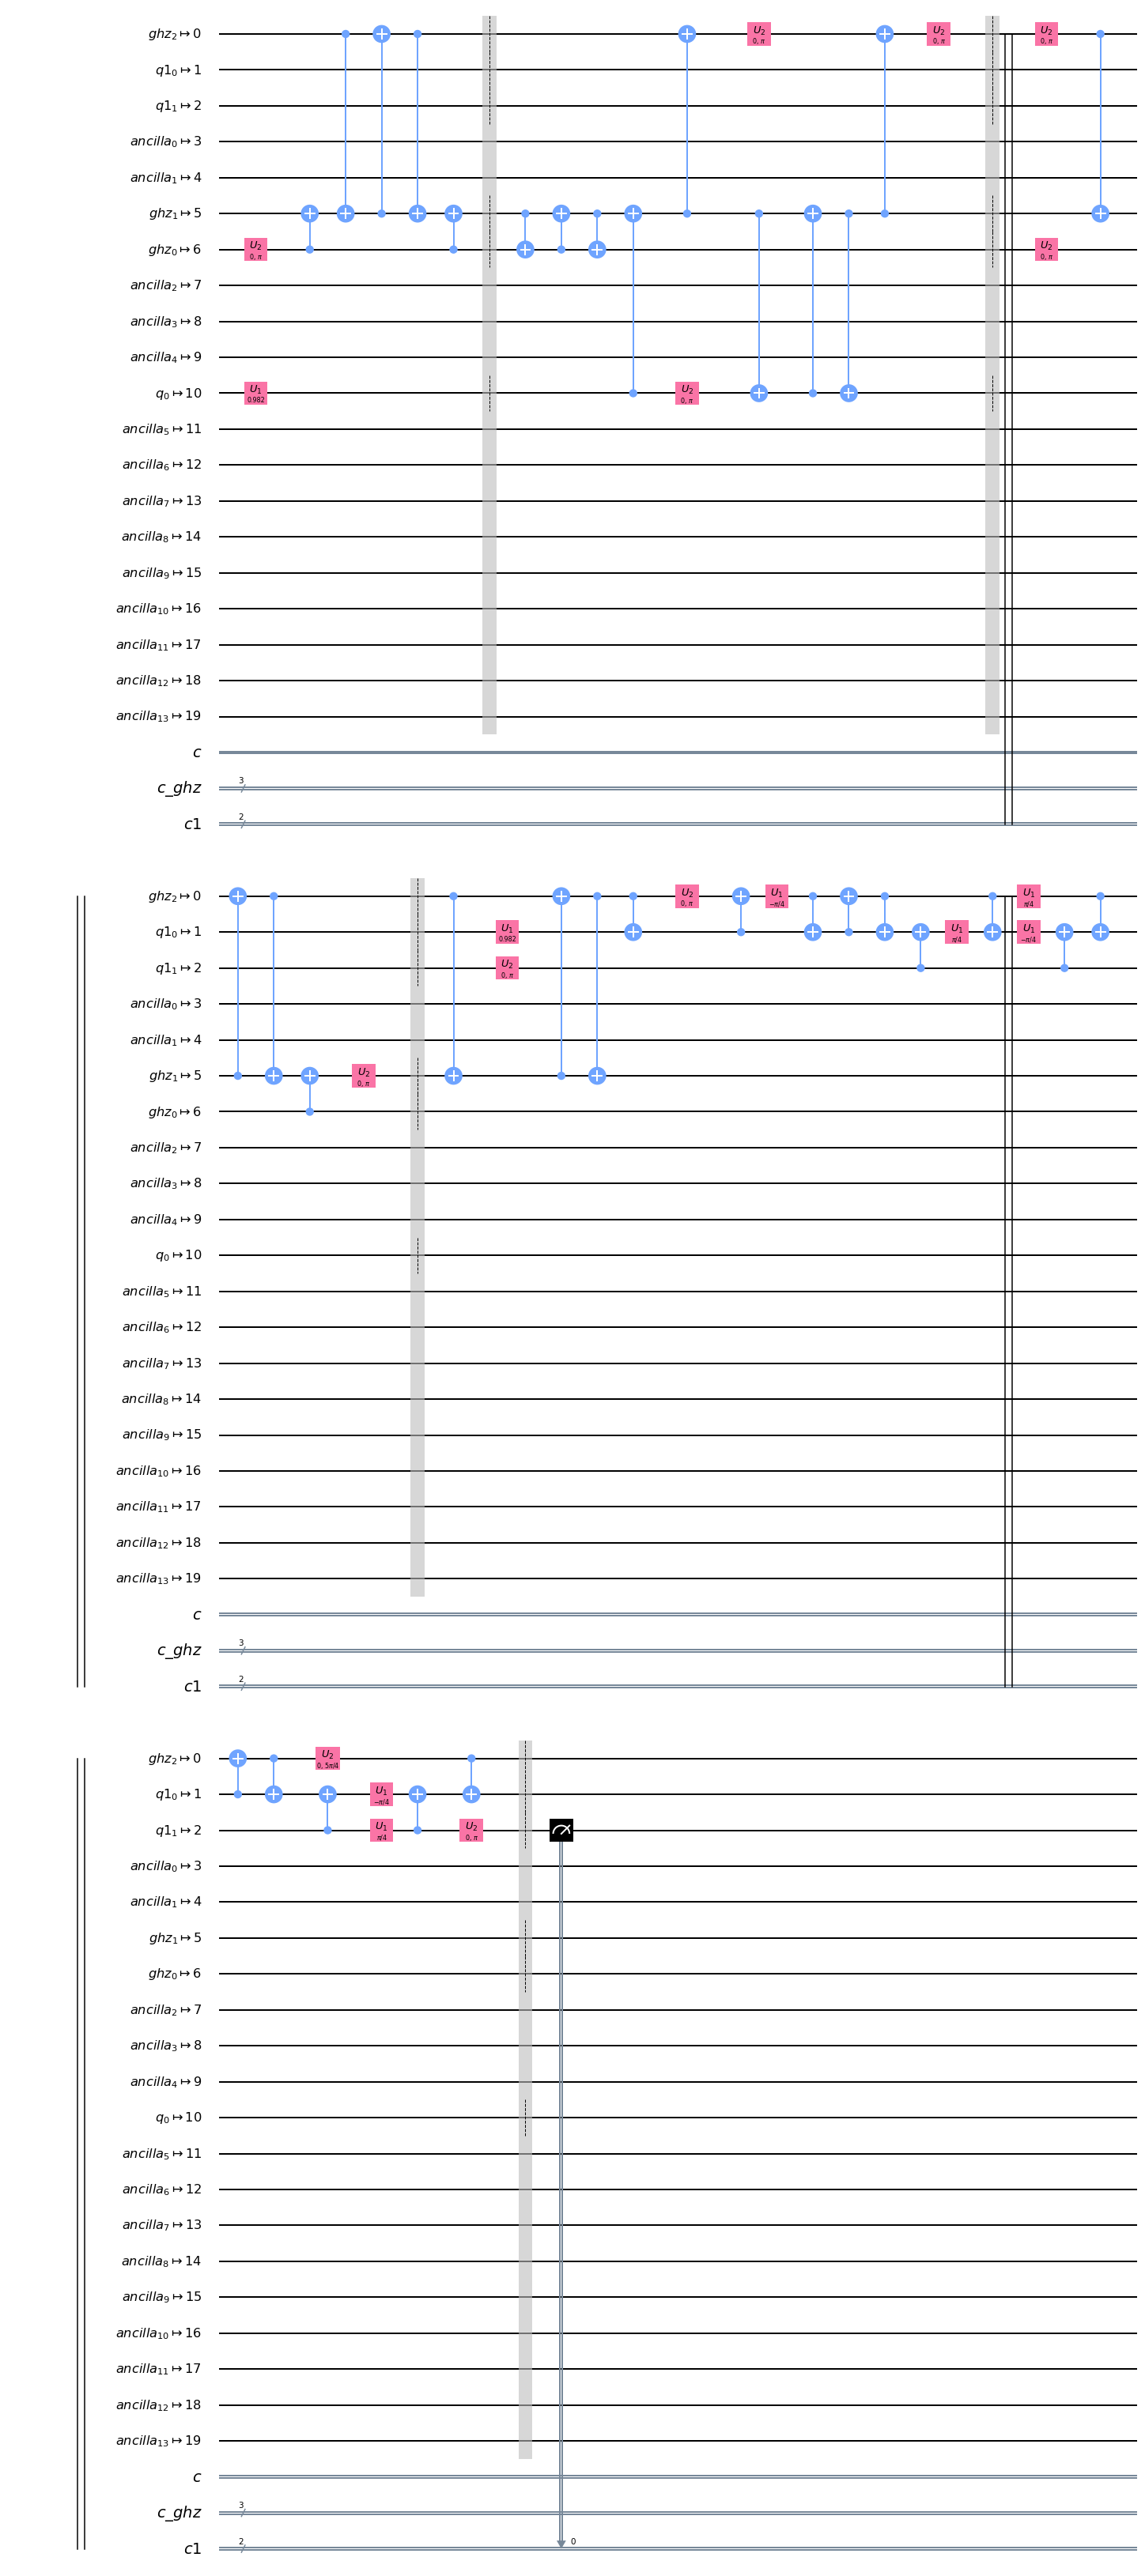

In [40]:
cheque_exp.draw(output='mpl')
circuit_drawer(cheque_exp,output='mpl')